In [1]:
import torch
from torch_geometric.datasets import Planetoid
dataset = Planetoid(root='dataset/cora', name='Cora')
data = dataset[0]

# Ausgabe der Schlüssel im Datensatz
print(data.keys)

# Anzeigen der Form und Beispielinhalte der Daten
print('Knotenfeatures (x):', data.x.shape)
print(data.x[:5])
print('Kanten (edge_index):', data.edge_index.shape)
print(data.edge_index)
print('Labels (y):', data.y.shape)
print(data.y[:5])
print('Trainingsmaske (train_mask):', data.train_mask.shape)
print('Validierungsmaske (val_mask):', data.val_mask.shape)
print('Testmaske (test_mask):', data.test_mask.shape)


<bound method BaseData.keys of Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])>
Knotenfeatures (x): torch.Size([2708, 1433])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
Kanten (edge_index): torch.Size([2, 10556])
tensor([[ 633, 1862, 2582,  ...,  598, 1473, 2706],
        [   0,    0,    0,  ..., 2707, 2707, 2707]])
Labels (y): torch.Size([2708])
tensor([3, 4, 4, 0, 3])
Trainingsmaske (train_mask): torch.Size([2708])
Validierungsmaske (val_mask): torch.Size([2708])
Testmaske (test_mask): torch.Size([2708])


In [2]:
# Kantenliste extrahieren und Gewicht hinzufügen (standardmäßig 1)
edge_index = data.edge_index.t().numpy()
weights = torch.ones(edge_index.shape[0], dtype=torch.float)
edges_with_weights = [(edge[0], edge[1], weight) for edge, weight in zip(edge_index, weights)]

print(edges_with_weights[:5])  # Ausgabe der ersten 5 Kanten mit Gewichten


[(633, 0, tensor(1.)), (1862, 0, tensor(1.)), (2582, 0, tensor(1.)), (2, 1, tensor(1.)), (652, 1, tensor(1.))]


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

class GraphLayoutNN(nn.Module):
    def __init__(self, num_nodes, embedding_dim=2):
        super(GraphLayoutNN, self).__init__()
        self.embeddings = nn.Embedding(num_nodes, embedding_dim)

    def forward(self, edge_index):
        src = self.embeddings(edge_index[:, 0])
        dst = self.embeddings(edge_index[:, 1])
        return src, dst

def loss_fn(src, dst, weights):
    # Verwende den Abstand als Verlust
    dist = torch.norm(src - dst, dim=1)
    return torch.mean(weights * dist)

# Anzahl der Knoten
num_nodes = data.num_nodes

# Modell initialisieren
model = GraphLayoutNN(num_nodes)
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Kanten als Tensor
edge_index = torch.tensor(edge_index, dtype=torch.long)

# Training
num_epochs = 2000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    src, dst = model(edge_index)
    loss = loss_fn(src, dst, weights)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

# Knotenkoordinaten nach dem Training extrahieren
node_positions = model.embeddings.weight.data


/tmp/ipykernel_799/1513595406.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_index = torch.tensor(edge_index, dtype=torch.long)


Epoch 0, Loss: 1.7965
Epoch 10, Loss: 1.6201
Epoch 20, Loss: 1.4542
Epoch 30, Loss: 1.2982
Epoch 40, Loss: 1.1525
Epoch 50, Loss: 1.0172
Epoch 60, Loss: 0.8925
Epoch 70, Loss: 0.7793
Epoch 80, Loss: 0.6772
Epoch 90, Loss: 0.5857
Epoch 100, Loss: 0.5043
Epoch 110, Loss: 0.4321
Epoch 120, Loss: 0.3690
Epoch 130, Loss: 0.3133
Epoch 140, Loss: 0.2648
Epoch 150, Loss: 0.2216
Epoch 160, Loss: 0.1838
Epoch 170, Loss: 0.1517
Epoch 180, Loss: 0.1252
Epoch 190, Loss: 0.1028
Epoch 200, Loss: 0.0843
Epoch 210, Loss: 0.0691
Epoch 220, Loss: 0.0568
Epoch 230, Loss: 0.0460
Epoch 240, Loss: 0.0374
Epoch 250, Loss: 0.0305
Epoch 260, Loss: 0.0252
Epoch 270, Loss: 0.0208
Epoch 280, Loss: 0.0171
Epoch 290, Loss: 0.0148
Epoch 300, Loss: 0.0130
Epoch 310, Loss: 0.0114
Epoch 320, Loss: 0.0101
Epoch 330, Loss: 0.0088
Epoch 340, Loss: 0.0078
Epoch 350, Loss: 0.0071
Epoch 360, Loss: 0.0063
Epoch 370, Loss: 0.0057
Epoch 380, Loss: 0.0052
Epoch 390, Loss: 0.0048
Epoch 400, Loss: 0.0044
Epoch 410, Loss: 0.0040
Epo

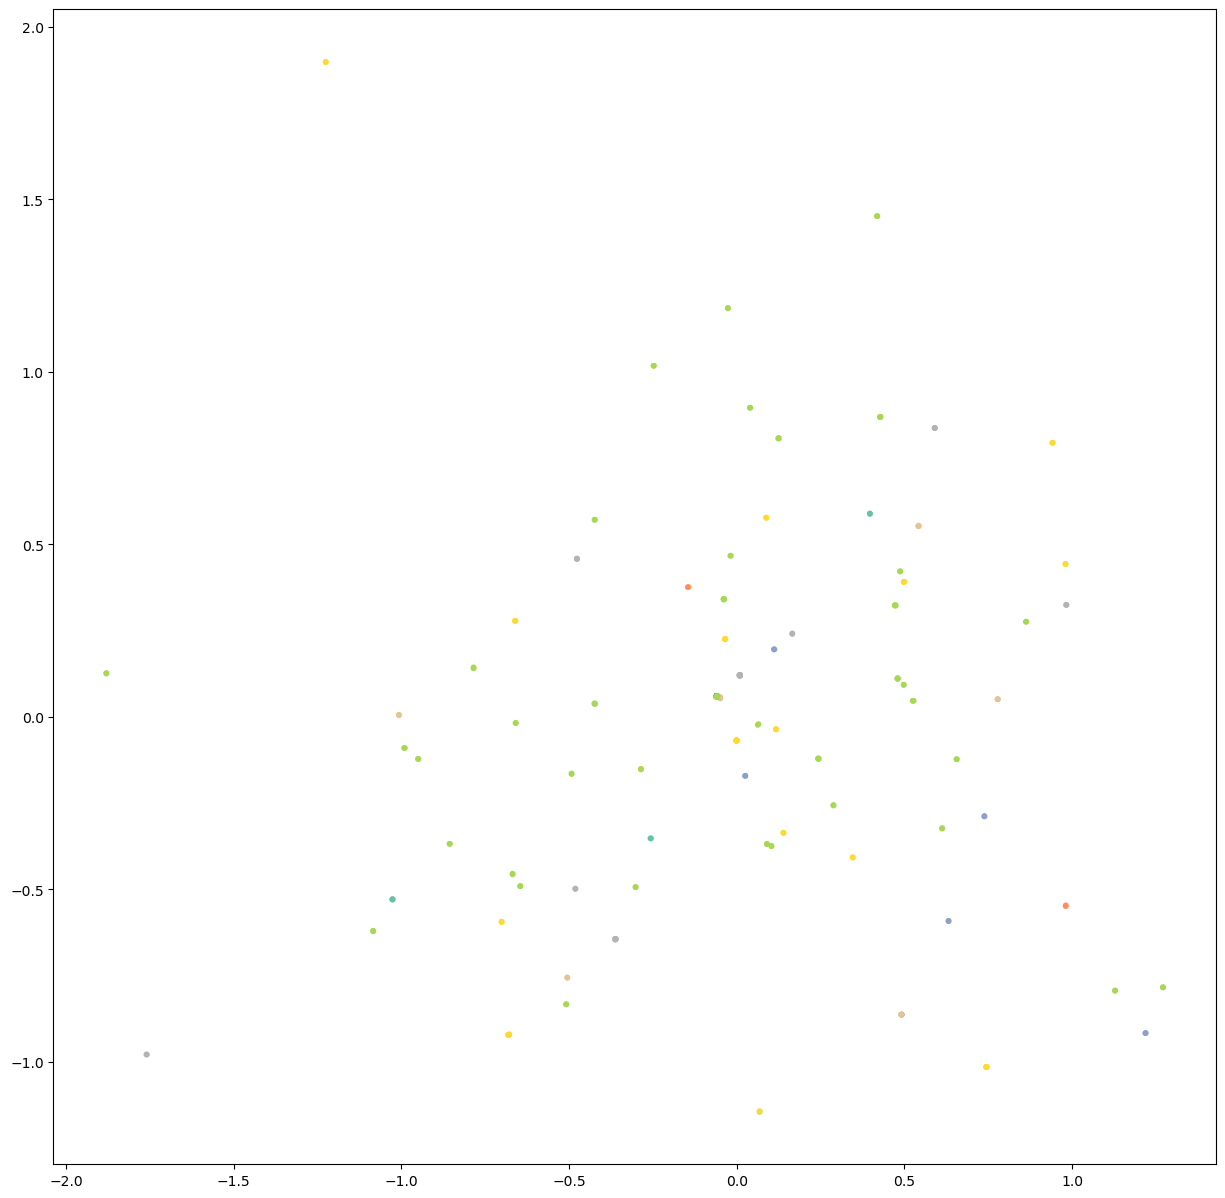

In [8]:
import matplotlib.pyplot as plt

# node_positions = node_positions.detach().numpy()

plt.figure(figsize=(15, 15))
plt.scatter(node_positions[:, 0], node_positions[:, 1], c=data.y.numpy(), cmap="Set2", s=10)
plt.show()
